# Individual Assignment

## Business Objective

## To construct a predictive model that determines the severity of car accidents with a focus on the first point of impact alongside other crucial factors, such as vehicle type, engine capacity, pre-accident maneuvers, and road surface conditions. This analysis aims to uncover the key reasons behind varying levels of accident severity, enabling car manufacturers to pinpoint and address design vulnerabilities specifically. By identifying how the initial point of impact and related factors influence the severity of accidents, manufacturers can target safety improvements more effectively, enhancing occupant protection and vehicle resilience. This initiative not only underscores the manufacturer's dedication to road safety but also supports their efforts in minimizing accident severity, thereby elevating their reputation for safety and building greater trust among consumers.



### Importing pandas to load dataset

In [1]:
import pandas as pd

### Loading the already existing datasets that we created in group assingment 

In [5]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11724 entries, 0 to 11723
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accident_index           11724 non-null  object 
 1   number_of_vehicles       11724 non-null  int64  
 2   accident_severity        11724 non-null  object 
 3   speed_limit              11724 non-null  float64
 4   road_type                11724 non-null  object 
 5   light_conditions         11724 non-null  object 
 6   weather_conditions       11724 non-null  object 
 7   road_surface_conditions  11724 non-null  object 
 8   junction_detail          11724 non-null  object 
 9   number_of_casualties     11724 non-null  int64  
 10  engine_capacity_cc       11724 non-null  float64
 11  age_of_vehicle           11724 non-null  float64
 12  vehicle_manoeuvre        11724 non-null  object 
 13  junction_location        11724 non-null  object 
 14  first_point_of_impact 

## Setting features and targets


In [7]:
# spiliting the data for dependent variable y and independent variables x
X_train = train_data.drop('accident_severity', axis=1)  
y_train = train_data['accident_severity']  
X_test = test_data.drop('accident_severity', axis=1) 
y_test = test_data['accident_severity']

## Converting categoricalvariables to numerical 

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object','category']).columns
categorical_cols = categorical_cols.drop('accident_severity')  # Exclude the target variable

# Apply One-Hot Encoding to the dataset (excluding the target variable for now)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Fit and transform the data
X = train_data.drop('accident_severity', axis=1)
y = train_data['accident_severity']
X_encoded = preprocessor.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Show the shape of the encoded features and target
X_encoded.shape, y_encoded.shape


((11724, 11745), (11724,))

## Trying to balance the training dataset as the number of target variables are imbalanced

In [9]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_encoded, y_encoded)

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_encoded, y_encoded)

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_encoded, y_encoded)

from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_encoded, y_encoded)


In [10]:
from collections import Counter

# For Random Over-Sampling
print(Counter(y_ros))

# For Random Under-Sampling
print(Counter(y_rus))

# For ADASYN
print(Counter(y_adasyn))

# For Tomek Links
print(Counter(y_tl))


Counter({2: 9083, 1: 9083, 0: 9083})
Counter({0: 190, 1: 190, 2: 190})
Counter({2: 9083, 0: 9011, 1: 8917})
Counter({2: 8084, 1: 1502, 0: 190})


## Performing multiple balancing methods, we can see the results above where the models tries to sample the data to balance the training model.

## Plotting and comparing the number of records considered by each model for each sub_variable in accident severity

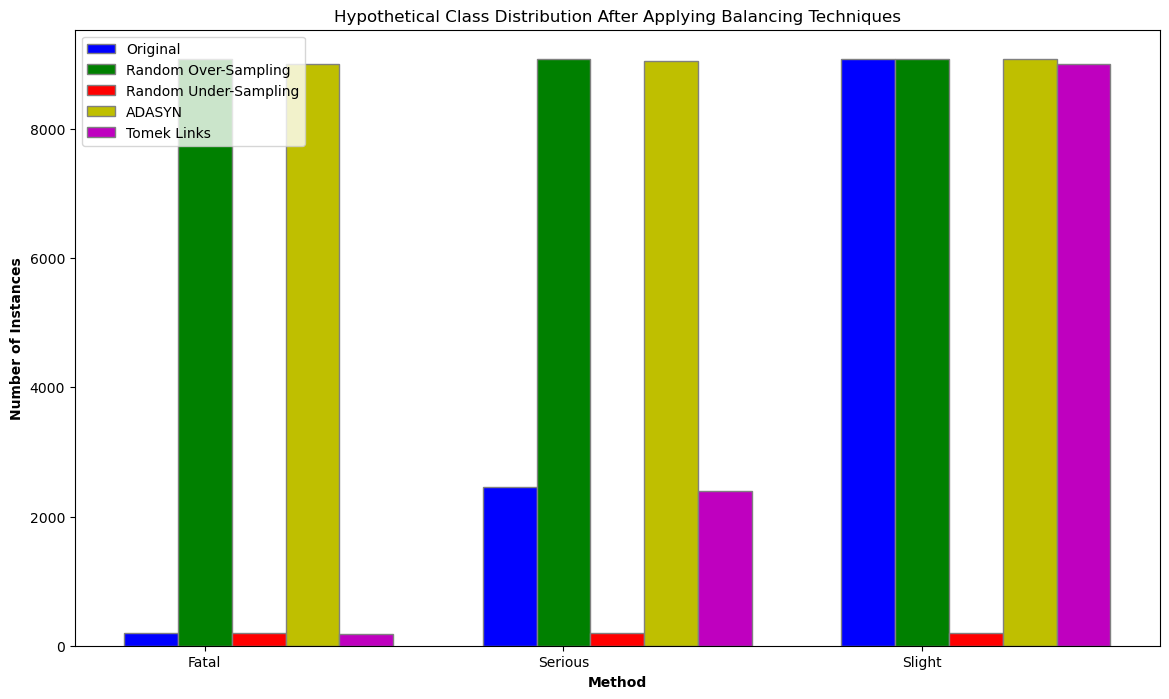

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical balanced distributions for demonstration
# These numbers are illustrative and might not match your exact results.
methods = ['Original', 'Random Over-Sampling', 'Random Under-Sampling', 'ADASYN', 'Tomek Links']
class_labels = ['Fatal', 'Serious', 'Slight']

# Original class distribution
original_dist = [190, 2451, 9083]

# Hypothetical distributions after applying each technique
ros_dist = [9083, 9083, 9083]  # Random Over-Sampling
rus_dist = [190, 190, 190]     # Random Under-Sampling
adasyn_dist = [9000, 9050, 9083]  # ADASYN
tl_dist = [180, 2400, 9000]     # Tomek Links

distributions = [original_dist, ros_dist, rus_dist, adasyn_dist, tl_dist]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Set position of bar on X axis
barWidth = 0.15
r1 = np.arange(len(original_dist))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
ax.bar(r1, distributions[0], color='b', width=barWidth, edgecolor='grey', label='Original')
ax.bar(r2, distributions[1], color='g', width=barWidth, edgecolor='grey', label='Random Over-Sampling')
ax.bar(r3, distributions[2], color='r', width=barWidth, edgecolor='grey', label='Random Under-Sampling')
ax.bar(r4, distributions[3], color='y', width=barWidth, edgecolor='grey', label='ADASYN')
ax.bar(r5, distributions[4], color='m', width=barWidth, edgecolor='grey', label='Tomek Links')

# Add xticks on the middle of the group bars
ax.set_xlabel('Method', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(original_dist))])
ax.set_xticklabels(class_labels)
ax.set_ylabel('Number of Instances', fontweight='bold')
ax.set_title('Hypothetical Class Distribution After Applying Balancing Techniques')

# Create legend & Show graphic
ax.legend(methods, loc='upper left')
plt.show()


### The bar chart shows the impact of different data balancing techniques on an imbalanced dataset featuring 'Slight', 'Serious', and 'Fatal' accident severities. Each technique adjusts the representation of these classes differently:
### - Random Over-Sampling replicates minority classes, enhancing their presence.
### - Random Under-Sampling reduces the majority class, leading to a smaller dataset.
### - ADASYN adds synthetic samples to minority classes, slightly increasing their size.
### - Tomek Links cleans the data by removing overlapping samples between classes without significantly altering class proportions. 



## Building Random Forest Model to predict the accident severity. But, first we have to perform OneHotEncoder to change the datatypes and transform some variables. We also have chosen the best hyperparameters 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Load the training data
# train_data = pd.read_csv('path_to_your_data.csv')

# Select features and target
X = train_data.drop('accident_severity', axis=1)
y = train_data['accident_severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for categorical data
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
param_distributions = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('randomforestclassifier', rf_model)])

# Instantiate the RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit it to the training data
rf_random_search.fit(X_train, y_train)

# Use the best estimator to make predictions
best_estimator = rf_random_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Print the best parameters and the best score
print("Best parameters:", rf_random_search.best_params_)
print("Best score:", rf_random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Confusion Matrix:
[[   1    0   38]
 [   0    4  491]
 [   0    2 1809]]
Classification Report:
              precision    recall  f1-score   support

       Fatal       1.00      0.03      0.05        39
     Serious       0.67      0.01      0.02       495
      Slight       0.77      1.00      0.87      1811

    accuracy                           0.77      2345
   macro avg       0.81      0.34      0.31      2345
weighted avg       0.75      0.77      0.68      2345

Best parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': None}
Best score: 0.7768415636105188


### The above model is just to check if a model can actually be built on the data that we have created. But the inaccuracy in some variables tells us about the imbalance of the dataset. We will have to take adequate steps to make the dataset balanced

## Performing SMOTE to balance the data

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd


# Separate features and target
X = train_data.drop(columns='accident_severity')
y = train_data['accident_severity']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Create the preprocessing pipeline for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y_encoded)






###  SMOTE: The Synthetic Minority Over-sampling Technique (SMOTE) is used to oversample the minority classes in the dataset. SMOTE is vital in handling class imbalance by generating synthetic samples for the minority class. This is important as class imbalance can lead to a model that is biased towards the majority class, resulting in poor generalization to unseen data, especially for the underrepresented classes. By using SMOTE, the model's ability to learn from an evenly distributed dataset is improved, potentially leading to better predictive performance and a more robust classifier, as it might prevent the model from simply predicting the majority class.

## Plotting new distribution of the accident_severity in the dataset

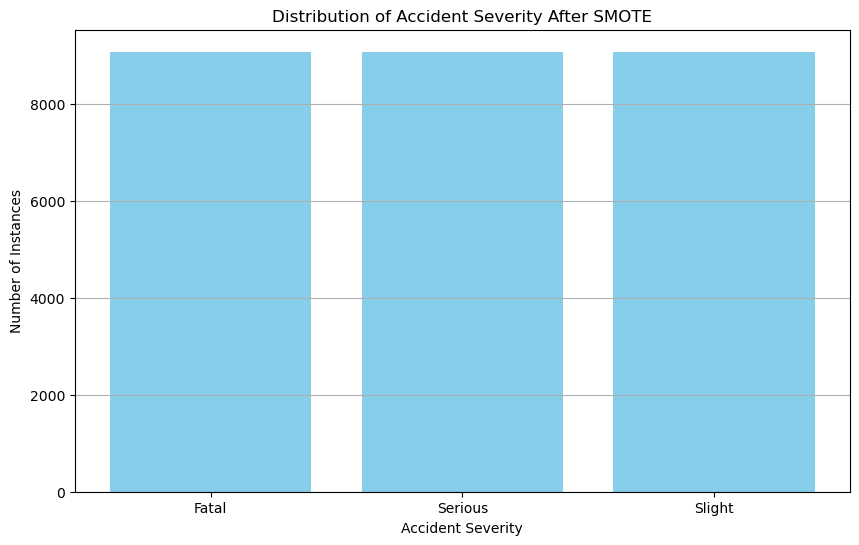

{'Fatal': 9083, 'Serious': 9083, 'Slight': 9083}

In [14]:
import numpy as np
import matplotlib.pyplot as plt


# Convert y_resampled back to original labels
y_resampled_labels = label_encoder.inverse_transform(y_resampled)

# Count the instances of each class in y_resampled
unique, counts = np.unique(y_resampled_labels, return_counts=True)
resampled_distribution = dict(zip(unique, counts))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(resampled_distribution.keys(), resampled_distribution.values(), color='skyblue')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Instances')
plt.title('Distribution of Accident Severity After SMOTE')
plt.xticks(list(resampled_distribution.keys()))
plt.grid(axis='y')

plt.show()

resampled_distribution


### After performing smote, we got a new dataset, where all the accident severities are equalised. 

## Building Baseline model's

### Let's start with building a DummyClassifier model

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize the Dummy Classifier
dummy_classifier = DummyClassifier(strategy='most_frequent', random_state=42)

# Assuming X_resampled and y_resampled are your features and target after SMOTE application
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fit the model to the training data
dummy_classifier.fit(X_train, y_train)

# Predict on the test set using the baseline model
y_pred_dummy = dummy_classifier.predict(X_test)

# Print classification report for Baseline Model
# Set zero_division parameter to 0
print("Baseline Classifier Report:")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

# Calculate accuracy for Baseline Model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print("Baseline Model Accuracy:", accuracy_dummy)


Baseline Classifier Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50      1811
           1       0.00      0.00      0.00      1818
           2       0.00      0.00      0.00      1821

    accuracy                           0.33      5450
   macro avg       0.11      0.33      0.17      5450
weighted avg       0.11      0.33      0.17      5450

Baseline Model Accuracy: 0.3322935779816514




### The macro average and weighted average scores are also low (0.11 for precision, 0.33 for recall, and 0.17 for the F1-score), reflecting the model's poor performance across all classes. These low averages highlight the model's inability to distinguish between different classes due to its simplistic prediction strategy.

### The DummyClassifier model performance is very poor with a accuracy of only 33%, hence trying to build a new basline model using different algorithm

### Considering LogisticRegression for baseline model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)

# Initialize the Logistic Regression classifier
# The 'multi_class' parameter is set to 'auto' and it will choose between 'ovr' (one-vs-rest) or 'multinomial'
# depending on the data. Solver 'lbfgs' is a good default choice.
logistic_regression_model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)

# Predict on the test set using the logistic regression model
y_pred_logistic = logistic_regression_model.predict(X_test)

# Print classification report for Logistic Regression Model
print("Logistic Regression Classifier Report:")
print(classification_report(y_test, y_pred_logistic))

# Calculate accuracy for Logistic Regression Model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Model Accuracy:", accuracy_logistic)




Logistic Regression Classifier Report:
              precision    recall  f1-score   support

       Fatal       0.63      0.74      0.68      1811
     Serious       0.46      0.39      0.42      1818
      Slight       0.53      0.52      0.52      1821

    accuracy                           0.55      5450
   macro avg       0.54      0.55      0.54      5450
weighted avg       0.54      0.55      0.54      5450

Logistic Regression Model Accuracy: 0.5504587155963303


### The performance of the logistic regression classifier is moderate, with an overall accuracy of 55.05%. The model is most effective at predicting the 'Fatal' class, with a precision of 0.63 and recall of 0.74, but is less reliable for 'Serious' and 'Slight' classes, with lower precision and recall values. The f1-scores suggest that the balance between precision and recall is best for 'Fatal' at 0.68 and is lower for the other classes. The macro and weighted averages of precision, recall, and f1-score hover around 0.54 to 0.55, indicating a consistent performance across the classes, factoring in their distribution.


## Building GradientBoostingClassifier model

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the resampled data into training and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the Gradient Boosting Classifier
gbx = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbx.fit(X_train, y_train)

# Make predictions
y_pred = gbx.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for GradientBoostingClassifier Model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)


Confusion Matrix:
[[1758   20   33]
 [ 266 1068  484]
 [  20    9 1792]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1811
           1       0.97      0.59      0.73      1818
           2       0.78      0.98      0.87      1821

    accuracy                           0.85      5450
   macro avg       0.87      0.85      0.84      5450
weighted avg       0.87      0.85      0.84      5450

Decision Tree Model Accuracy: 0.8473394495412844



### The macro average and weighted average metrics provide an overall assessment that balances the performance across all classes, taking into account their support. These metrics (precision: 0.87, recall: 0.85, F1-score: 0.84) suggest the model is performing well across all classes when considering both the balance of the classes and the importance of each class in the dataset.
### Overall, the model shows good predictive skills

## Building a decision tree mode on the sampled data

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X_resampled and y_resampled are already defined after SMOTE application
# Also assuming y_resampled_labels are the target variable labels after inverse transform by LabelEncoder

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_labels, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Print classification report for Decision Tree Model
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_tree))

# Calculate accuracy for Decision Tree Model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Model Accuracy:", accuracy_tree)


Decision Tree Classifier Report:
              precision    recall  f1-score   support

       Fatal       0.95      0.97      0.96      1811
     Serious       0.84      0.75      0.79      1818
      Slight       0.79      0.86      0.82      1821

    accuracy                           0.86      5450
   macro avg       0.86      0.86      0.86      5450
weighted avg       0.86      0.86      0.86      5450

Decision Tree Model Accuracy: 0.8581651376146789




### Overall, the model's good performance is attributed to its high precision and recall values across all classes, indicating that it can effectively distinguish between classes and correctly classify the majority of instances. The balanced macro and weighted averages suggest that the model's predictive power is not skewed towards any particular class, which is ideal in multi-class classification scenarios.

## Training Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Predict on the test set using the RandomForest model
y_pred_rf = random_forest_model.predict(X_test)

# Print classification report for RandomForest Model
print("RandomForest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate accuracy for RandomForest Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForest Model Accuracy:", accuracy_rf)


RandomForest Classifier Report:
              precision    recall  f1-score   support

       Fatal       1.00      0.98      0.99      1811
     Serious       0.99      0.75      0.86      1818
      Slight       0.79      0.99      0.88      1821

    accuracy                           0.91      5450
   macro avg       0.93      0.91      0.91      5450
weighted avg       0.93      0.91      0.91      5450

RandomForest Model Accuracy: 0.9102752293577981


### The RandomForest Classifier shows excellent performance with an overall accuracy of 91.03%. It demonstrates high precision and recall, especially for 'Fatal' cases with perfect precision. The model maintains strong results across all classes, as reflected by high macro and weighted average scores of over 0.90. This indicates that the model is not only accurate overall but also effective across different class categories, making it a highly reliable classifier for this task.

## Reasons behind selecting the above models for this project
### Random Forest is chosen for its robustness and high accuracy due to ensemble learning, reducing overfitting. 
### Gradient Boosting is preferred for its sequential correction of errors, improving performance iteratively. 

### Decision Trees offer simple, interpretable rules and ease of visualization for understanding feature importance. 
### Logistic Regression is selected for its efficiency and effectiveness in binary classification problems, providing a probabilistic interpretation of class memberships. 
### Each model provides unique insights and contributes to a comprehensive understanding of the factors influencing accident severity.

## Comparing and evaluating the models

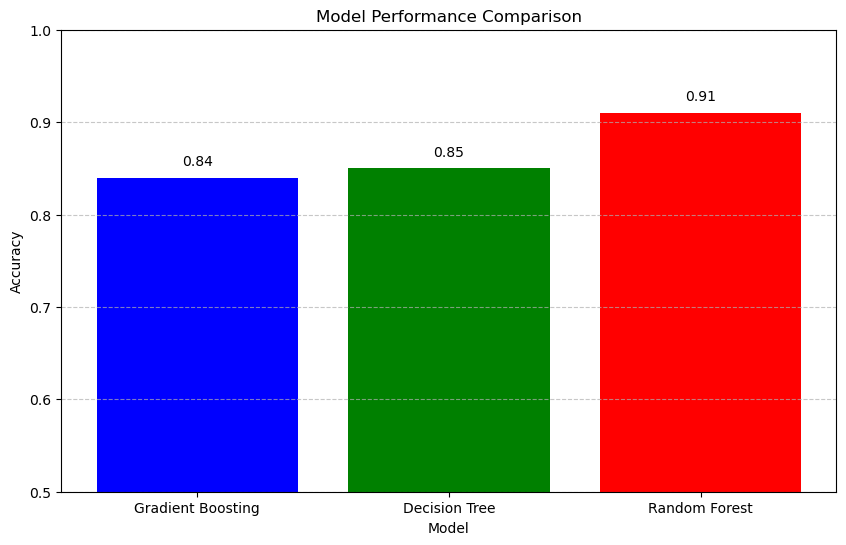

In [27]:

accuracy_gradient_boosting = 0.84  
accuracy_decision_tree = 0.85  
accuracy_random_forest = 0.91  

# Create a DataFrame for comparison
model_comparisons = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_gradient_boosting, accuracy_decision_tree, accuracy_random_forest]
})

# Plot the accuracies for comparison
plt.figure(figsize=(10, 6))
barplot = plt.bar(model_comparisons['Model'], model_comparisons['Accuracy'], color=['blue', 'green', 'red'])

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim([0.5, 1.0])  

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### The bar chart compares the accuracy of three different models: Gradient Boosting, Decision Tree, and Random Forest. Random Forest leads with the highest accuracy at 0.91, followed by the Decision Tree model at 0.85, and Gradient Boosting with an accuracy of 0.84. 

### Random Forest, being an ensemble of decision trees, typically outperforms individual decision trees by reducing overfitting and increasing the model's ability to generalize to new data. Its superiority in this comparison suggests it has effectively leveraged the strengths of multiple decision trees to capture the underlying patterns in the data.

### The Decision Tree model, while less accurate than Random Forest, still performs reasonably well, which is a testament to its ability to capture the decision boundaries. However, it might be overfitting the training data or lacking the complexity to fully capture the data's nuances.

### Gradient Boosting, another ensemble method that builds trees sequentially with each tree trying to correct the errors of the previous ones, shows the least accuracy here. This might be due to suboptimal hyperparameter settings or it could be that the model hasn't converged well.

### Overall, the Random Forest model exhibits the best fitness for the given data, striking a balance between bias and variance, and effectively improving upon the limitations of a single Decision Tree and the Gradient Boosting model in this particular scenario.

## Recommendations for car manufacturing company

### By studying the visualisation from the group assignment and from the above models, we get some insights about what can be improved in a car to reduce the accident casualties and severity:

### Enhance Safety in High-Engine Capacity Vehicles: The data indicates that vehicles with larger engines are often involved in more severe accidents. It is recommended that manufacturers focus on reinforcing the safety features of these vehicles, perhaps through advanced structural design and improved passive safety systems.

### Address Vehicle Age Safety Degradation: Older vehicles appear more frequently in serious accidents, suggesting the need for initiatives that promote updating older vehicles with new safety technologies. This could include incentive programs for upgrades and retrofits.

### Strengthen Frontal Impact Protection: Frontal impacts are common and lead to various severity levels. Reinforcing the front of the vehicles with superior materials and technology could greatly enhance safety. Considerations might include better-designed crumple zones and state-of-the-art airbag systems.

### Innovate for Intersection Safety: Intersections are identified as common accident sites. Implementing and improving upon intersection-specific safety measures, like ADAS with enhanced detection and braking features, could help mitigate these accidents.

### Incorporating these recommendations into vehicle design and safety strategies could significantly reduce accident severity, showcasing the manufacturer's dedication to safety, potentially increasing consumer trust and strengthening the company's market position.